In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'Angsana New'
rcParams.update({'font.size': 22})
rcParams['axes.unicode_minus'] = False

In [3]:
df_sp_05_2019 = pd.read_csv('data/chol-sp05-bangkhanak-2019-hourly-corrected.csv', parse_dates=["datetime"])
df_sp_05_2022 = pd.read_csv('data/chol-sp05-bangkhanak-2022-hourly-corrected.csv', parse_dates=["datetime"])
df_sp_06 = pd.read_csv('data/chol-sp06-bangkrajed-2021-2022-hourly.csv', parse_dates=["datetime"])
df_sp_07 = pd.read_csv('data/chol-sp07-bangkhla-corrected-2017-2022-hourly.csv', parse_dates=["datetime"])
df_sp_08 = pd.read_csv('data/chol-sp08-chachoengsao-2020-2022-hourly-corrected.csv', parse_dates=["datetime"])
df_sp_09 = pd.read_csv("data/chol-sp09-cholcha-2021-2022-hourly-corrected.csv", parse_dates=["datetime"])
df_sp_10 = pd.read_csv('data/chol-sp10-bangpakong-2021-2022-hourly-corrected.csv', parse_dates=["datetime"])

In [4]:
df_05_2019 = df_sp_05_2019.loc[df_sp_05_2019["datetime"].dt.hour == 6]
df_05_2022 = df_sp_05_2022.loc[df_sp_05_2022["datetime"].dt.hour == 6]

df_06 = df_sp_06.loc[df_sp_06["datetime"].dt.hour == 6]
df_06_to_2021 = df_sp_06.loc[(df_sp_06["datetime"].dt.hour == 6) & (df_sp_06["datetime"].dt.year<=2021)]
df_06_2022 = df_sp_06.loc[(df_sp_06["datetime"].dt.hour == 6) & (df_sp_06["datetime"].dt.year==2022)]

df_07 = df_sp_07.loc[(df_sp_07["datetime"].dt.hour == 6) & (df_sp_07["datetime"].dt.year==2022)]

df_08 = df_sp_08.loc[df_sp_08["datetime"].dt.hour == 6]
df_08_to_2021 = df_sp_08.loc[(df_sp_08["datetime"].dt.hour == 6) & (df_sp_08["datetime"].dt.year <= 2021)]
df_08_2022 = df_sp_08.loc[(df_sp_08["datetime"].dt.hour == 6) & (df_sp_08["datetime"].dt.year == 2022)]

df_09 = df_sp_09.loc[(df_sp_09["datetime"].dt.hour == 6)]
df_09_train = df_09.loc[(df_09["datetime"].dt.year<2022)]
df_09_val = df_09.loc[(df_09["datetime"].dt.year==2022)]

df_10 = df_sp_10.loc[df_sp_10["datetime"].dt.hour == 6]

<Axes: title={'center': 'SP10'}>

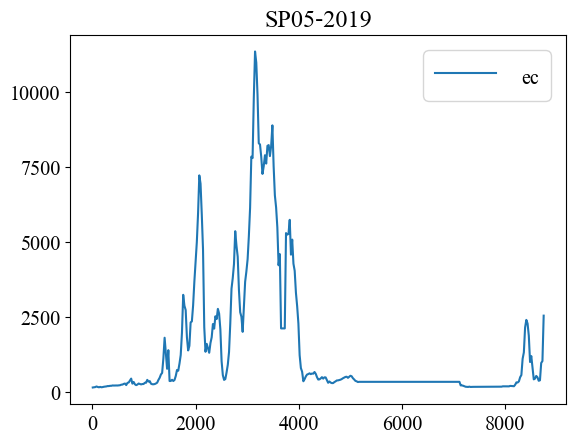

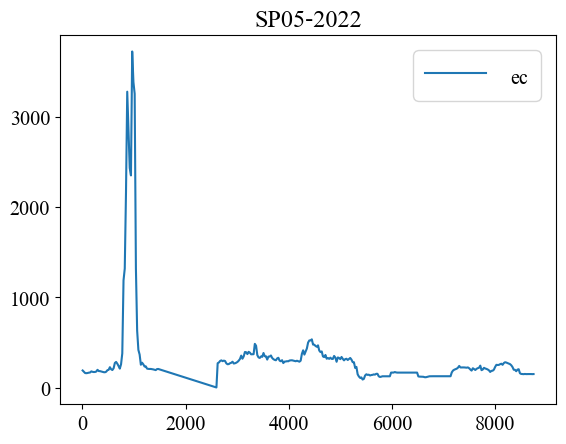

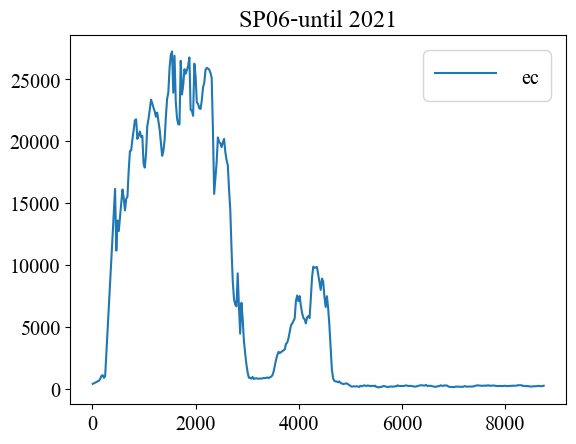

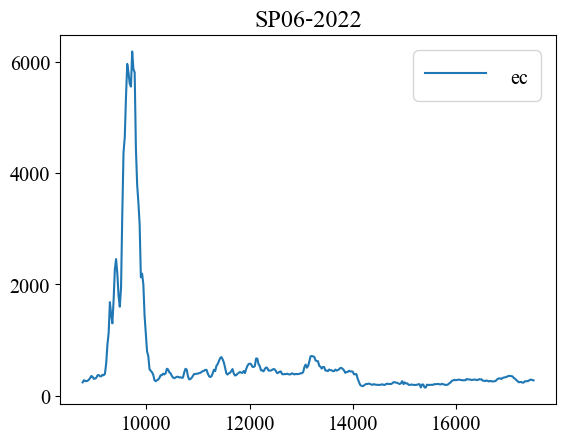

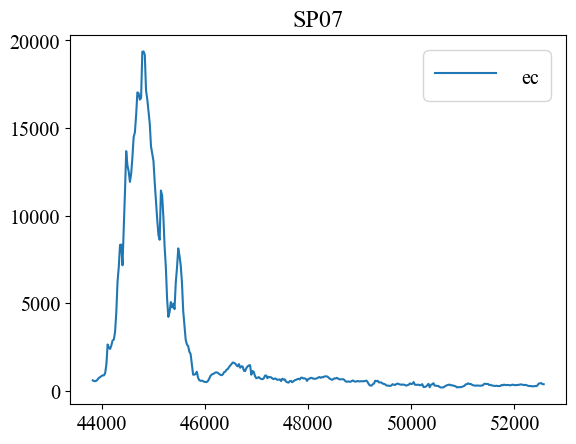

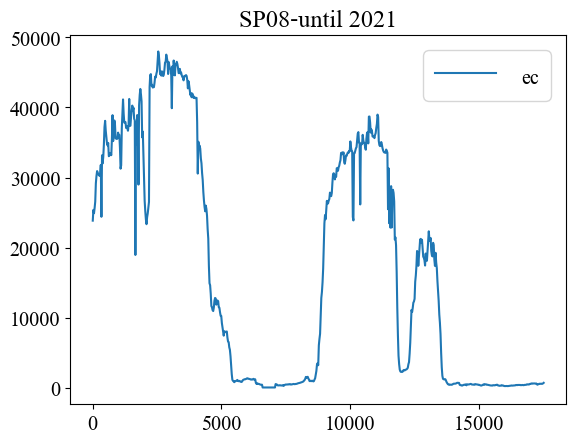

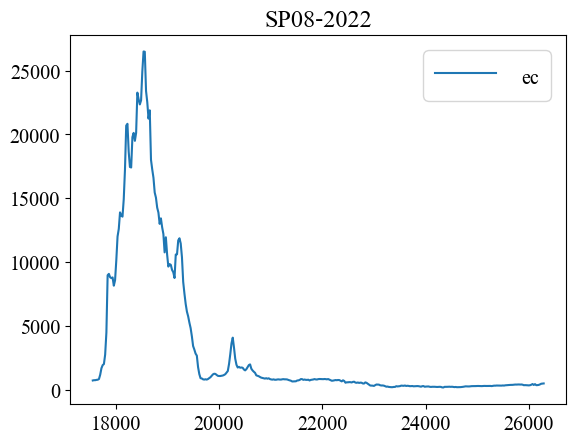

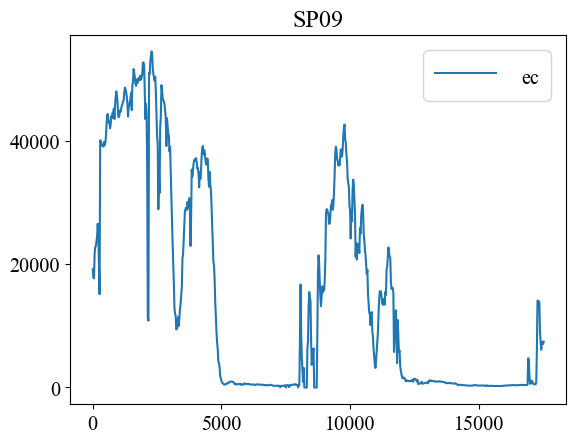

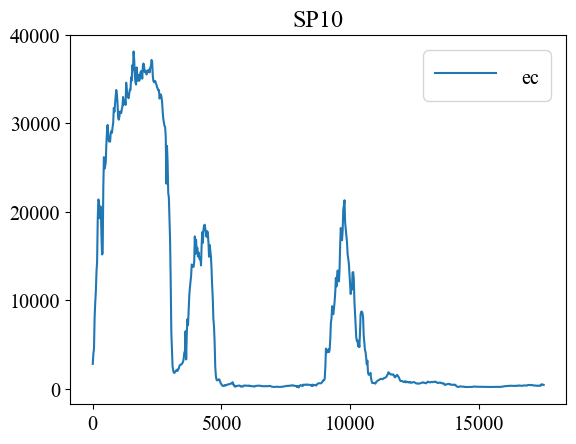

In [5]:
df_05_2019[["ec"]].plot(title="SP05-2019")
df_05_2022[["ec"]].plot(title="SP05-2022")

# df_06[["ec"]].plot(title="SP06")
df_06_to_2021[["ec"]].plot(title="SP06-until 2021")
df_06_2022[["ec"]].plot(title="SP06-2022")

df_07[["ec"]].plot(title="SP07")

# df_08[["ec"]].plot(title="SP08")
df_08_to_2021[["ec"]].plot(title="SP08-until 2021")
df_08_2022[["ec"]].plot(title="SP08-2022")

df_09[["ec"]].plot(title="SP09")
# df_09_train[["ec"]].plot(title="SP09_train")
# df_09_val[["ec"]].plot(title="SP09_val")

df_10[["ec"]].plot(title="SP10")

In [6]:
"""
train: 8<=2021 6<=2021
val: 8=2022 6=2022
test: 7
"""

'\ntrain: 8<=2021 6<=2021\nval: 8=2022 6=2022\ntest: 7\n'

In [7]:
for df in [
            df_05_2019,
           df_05_2022,
           df_06,
           df_06_to_2021,
           df_06_2022,
           df_07,
           df_08,
           df_08_to_2021,
           df_08_2022,
           df_09,
           df_10
           ]:
    df = df.set_index(pd.DatetimeIndex(df["datetime"])).drop(["datetime"], axis=1)

In [8]:
# # =============================================================================
# # Define the variables you want to use to train the model.
# # =============================================================================

#
dataset_05_2019 = df_05_2019.filter(["ec"]).values
dataset_05_2022 = df_05_2022.filter(["ec"]).values

dataset_06 = df_06.filter(["ec"]).values
dataset_06_to_2021 = df_06_to_2021.filter(["ec"]).values
dataset_06_2022 = df_06_2022.filter(["ec"]).values

dataset_07 = df_07.filter(["ec"]).values

dataset_08 = df_08.filter(["ec"]).values
dataset_08_to_2021 = df_08_to_2021.filter(["ec"]).values
dataset_08_2022 = df_08_2022.filter(["ec"]).values

dataset_09 = df_09.filter(["ec"]).values
dataset_09_train = df_09_train.filter(["ec"]).values
dataset_09_val = df_09_val.filter(["ec"]).values

dataset_10 = df_10.filter(["ec"]).values

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
# =============================================================================
# MinMaxScaler
# =============================================================================

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(np.concatenate([
                            dataset_05_2019,
                           dataset_05_2022,
                           dataset_06,
                           dataset_07,
                           dataset_08,
                           dataset_09,
                           dataset_10
                           ]))
# scaler.fit(np.concatenate([
#                            dataset_06,
#                            dataset_07,
#                            dataset_08
#                            ]))

dataset_05_2019_scaled = scaler.transform(dataset_05_2019)
dataset_05_2022_scaled = scaler.transform(dataset_05_2022)

dataset_06_scaled = scaler.transform(dataset_06)
dataset_06_to_2021_scaled = scaler.transform(dataset_06_to_2021)
dataset_06_2022_scaled = scaler.transform(dataset_06_2022)

dataset_07_scaled = scaler.transform(dataset_07)

dataset_08_scaled = scaler.transform(dataset_08)
dataset_08_to_2021_scaled = scaler.transform(dataset_08_to_2021)
dataset_08_2022_scaled = scaler.transform(dataset_08_2022)

dataset_09_scaled = scaler.transform(dataset_09)
dataset_09_train_scaled = scaler.transform(dataset_09_train)
dataset_09_val_scaled = scaler.transform(dataset_09_val)

dataset_10_scaled = scaler.transform(dataset_10)

In [11]:
n_future = 14
n_past = 28

# n_future = 7
# n_past = 14

In [12]:
# # =============================================================================
# # Test set (for multiple output)
# # =============================================================================    

test_set = dataset_07_scaled
test_real = dataset_07

x_test = []
y_test = []

for i in range(n_past, len(test_set) - n_future + 1):
    x_test.append(test_set[i - n_past:i, 0:dataset_07.shape[1]])
    y_test.append(test_real[i:i + n_future, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

In [13]:
# =============================================================================
# Train set (for multiple datasets)
# =============================================================================

# datasets_train = [dataset_10_scaled,
#                   dataset_09_scaled,
#                   dataset_08_to_2021_scaled,
#                   dataset_06_to_2021_scaled,
#                   dataset_05_2019_scaled,
#                   dataset_05_2022_scaled
#                   ]
datasets_train = [dataset_08_to_2021_scaled,
                  dataset_06_to_2021_scaled
                  ]

x_train = []
y_train = []

for dataset in datasets_train:
    
    train_set = dataset

    for i in range(n_past, len(train_set) - n_future + 1):
        x_train.append(train_set[i - n_past:i, 0:dataset.shape[1]])
        y_train.append(train_set[i:i + n_future, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))

In [14]:
# =============================================================================
# Validation set (for multiple datasets)
# =============================================================================

datasets = [dataset_08_2022_scaled, dataset_06_2022_scaled]

x_valid = []
y_valid = []

for dataset in datasets:
    
    valid_set = dataset

    for i in range(n_past, len(valid_set) - n_future + 1):
        x_valid.append(valid_set[i - n_past:i, 0:dataset.shape[1]])
        y_valid.append(valid_set[i:i + n_future, 0])

x_valid, y_valid = np.array(x_valid), np.array(y_valid)
y_valid = np.reshape(y_valid, (y_valid.shape[0], y_valid.shape[1], 1))

In [15]:
from keras import Model
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import SimpleRNN
from keras.layers import LSTM
# from keras.layers import CuDNNLSTM
from keras.layers import Bidirectional
# from tensorflow.keras.layers import Bidirectional
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
# =============================================================================
# Bidirectional LSTM
# =============================================================================

model = Sequential()
model.add(Bidirectional(LSTM(140, return_sequences=True), input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Bidirectional(LSTM(140,return_sequences=False)))
# model.add(Dense(n_future))
model.add(Dense(n_future,activation='relu'))

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 28, 280)          159040    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 280)              471520    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 14)                3934      
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 28, 280)          159040    
 l)                                                              
                                                        

In [18]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [19]:
checkpoint_filepath = 'checkpoint/bilstm-14-sp-[8_to2021-6_to2021]-[8_2022-6_2022]-[7]-140x2-batch-30-relu_at_output.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_freq='epoch',
    verbose=1
    )

In [20]:
model_fit = model.fit(
    x_train,
    y_train,
    batch_size=30,
    epochs=128,
    validation_data=(x_valid, y_valid),
    callbacks=[model_checkpoint_callback, early_stopping_callback]
    )

Epoch 1/128
34/34 [==============================] - ETA: 0s - loss: 0.0387 - mse: 0.0387
Epoch 1: val_loss improved from inf to 0.00155, saving model to checkpoint\bilstm-14-sp-[8_to2021-6_to2021]-[8_2022-6_2022]-[7]-140x2-batch-30-relu_at_output.h5
34/34 [==============================] - 14s 200ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/128
34/34 [==============================] - ETA: 0s - loss: 0.0119 - mse: 0.0119
Epoch 2: val_loss improved from 0.00155 to 0.00099, saving model to checkpoint\bilstm-14-sp-[8_to2021-6_to2021]-[8_2022-6_2022]-[7]-140x2-batch-30-relu_at_output.h5
34/34 [==============================] - 5s 137ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 9.8701e-04 - val_mse: 9.8701e-04
Epoch 3/128
34/34 [==============================] - ETA: 0s - loss: 0.0087 - mse: 0.0087
Epoch 3: val_loss did not improve from 0.00099
34/34 [==============================] - 5s 150ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0012 - v

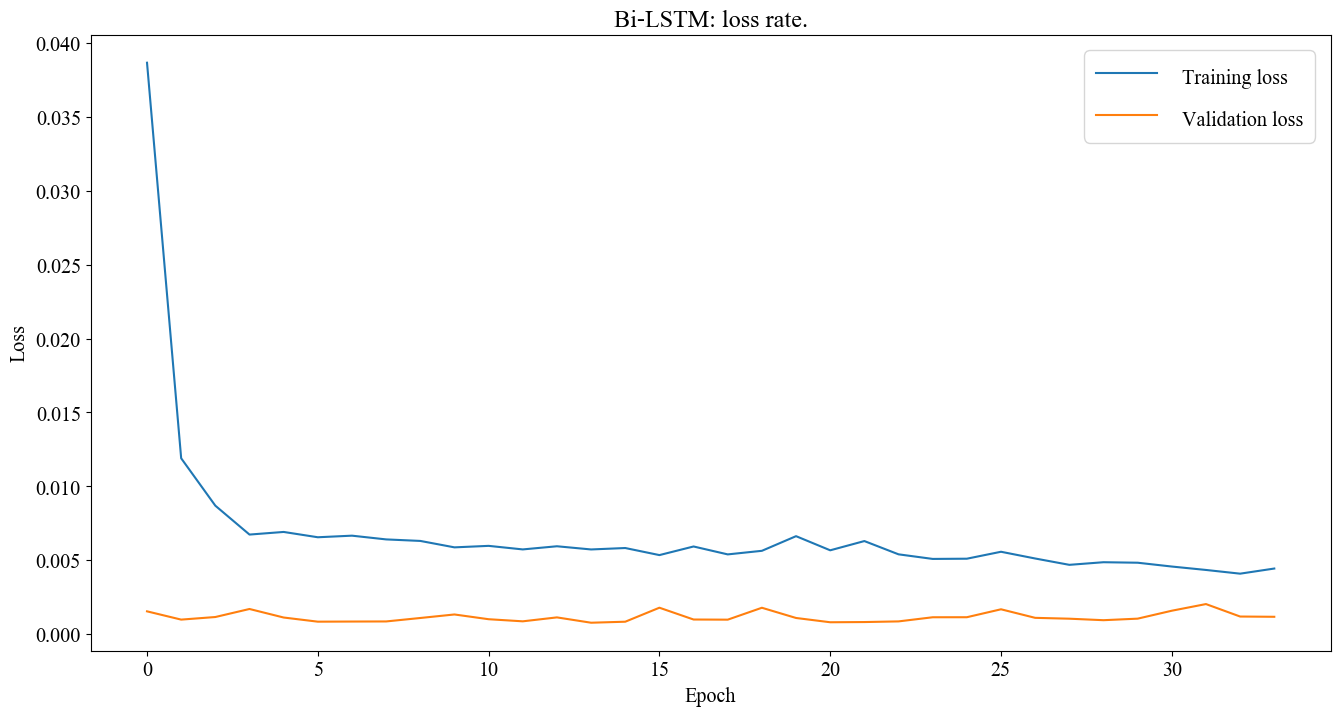

In [21]:
plt.figure(figsize=(16,8))
plt.title('Bi-LSTM: loss rate.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(model_fit.history['loss'], label='Training loss')
plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [22]:
from keras.models import load_model

# model = load_model('checkpoint/bilstm-14-sp-[10-9-8-6_to2021-5_2019-5_2022]-[8_2022]-[7]-140x2-batch-30-relu_at_output.h5')
model = load_model(checkpoint_filepath)

In [23]:
pred = model.predict(x_test)

11/11 [==============================] - 2s 17ms/step


In [24]:
r_pred = None

In [25]:
dataset_test = np.concatenate([dataset_07])

In [26]:
for i in range(pred.shape[1]):
    t_pred = pred[:,i]
    t_pred = np.reshape(t_pred, (t_pred.shape[0], 1))
    t_pred = np.repeat(t_pred, dataset_test.shape[1], axis=-1)
    t_pred = scaler.inverse_transform(t_pred)[:,0]
    t_pred = np.reshape(t_pred, (t_pred.shape[0], 1))
    if r_pred is None:
        r_pred = t_pred
    else:
        r_pred = np.append(r_pred, t_pred, axis=1)

In [27]:
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))

In [28]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, r_pred, squared=False)
print("RMSE =",rmse)

RMSE = 1550.9167776166191


In [29]:
from sklearn.metrics import mean_absolute_percentage_error

# calculate MAPE
mape = mean_absolute_percentage_error(y_test, r_pred)
print(f'MAPE = {mape}')

MAPE = 0.8276617772007373


In [30]:
# =============================================================================
# Calculate the Loss Function of each Timestep.
# =============================================================================

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

for i in range(r_pred.shape[1]):
    y_pred = r_pred[:,i]
    y_pred = np.reshape(y_pred, (y_pred.shape[0], 1))
    y_real = y_test[:,i]
    y_real = np.reshape(y_real, (y_real.shape[0], 1))
    rmse = mean_squared_error(y_real, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    print(f'Calculate the loss function of Timestep t+{i+1}.')
    print(f'• RMSE of Timestep t+{i+1} = {rmse}')
    print(f'• MAPE of Timestep t+{i+1} = {mape}')
    print('')

Calculate the loss function of Timestep t+1.
• RMSE of Timestep t+1 = 953.2482418307188
• MAPE of Timestep t+1 = 0.8654518836292089

Calculate the loss function of Timestep t+2.
• RMSE of Timestep t+2 = 1088.5458359577865
• MAPE of Timestep t+2 = 0.878284783067621

Calculate the loss function of Timestep t+3.
• RMSE of Timestep t+3 = 1265.4143228273235
• MAPE of Timestep t+3 = 0.8833955642947499

Calculate the loss function of Timestep t+4.
• RMSE of Timestep t+4 = 1339.8269836268491
• MAPE of Timestep t+4 = 0.8192712744876839

Calculate the loss function of Timestep t+5.
• RMSE of Timestep t+5 = 1462.4249060855543
• MAPE of Timestep t+5 = 0.8195419482833952

Calculate the loss function of Timestep t+6.
• RMSE of Timestep t+6 = 1494.09547526991
• MAPE of Timestep t+6 = 0.6718482918176053

Calculate the loss function of Timestep t+7.
• RMSE of Timestep t+7 = 1639.7364528815308
• MAPE of Timestep t+7 = 0.8190571867811749

Calculate the loss function of Timestep t+8.
• RMSE of Timestep t+

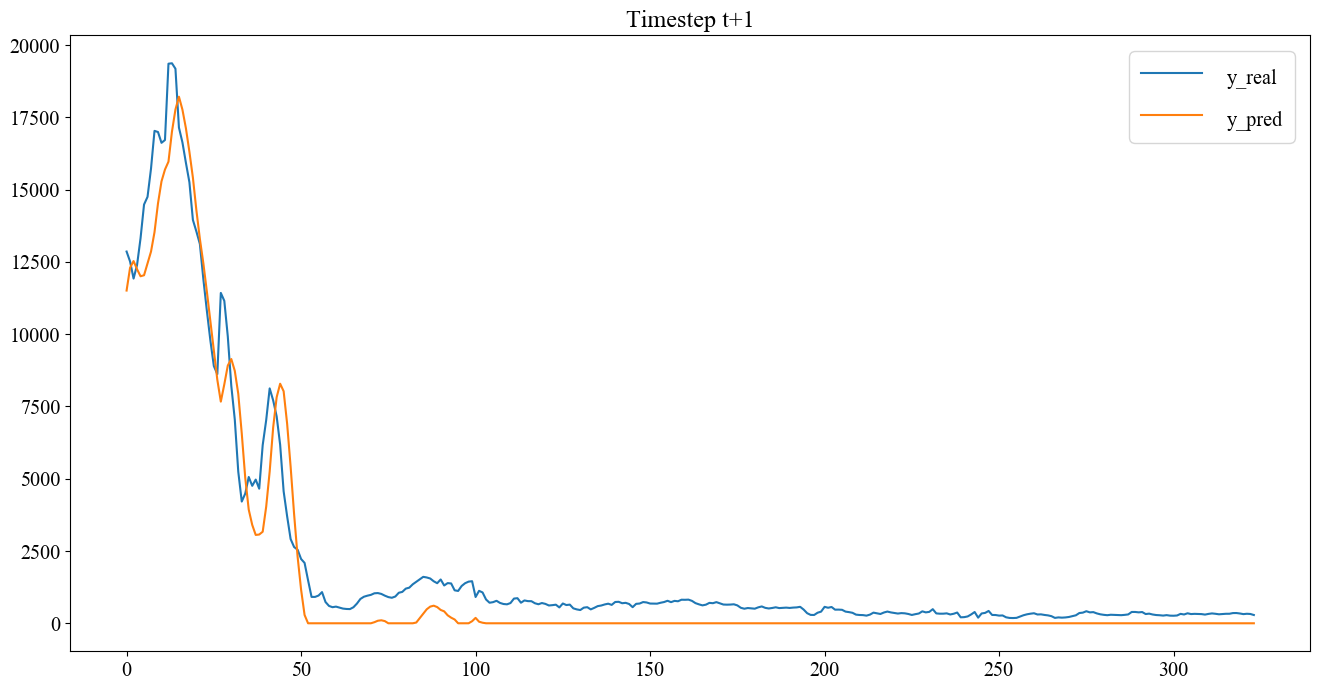

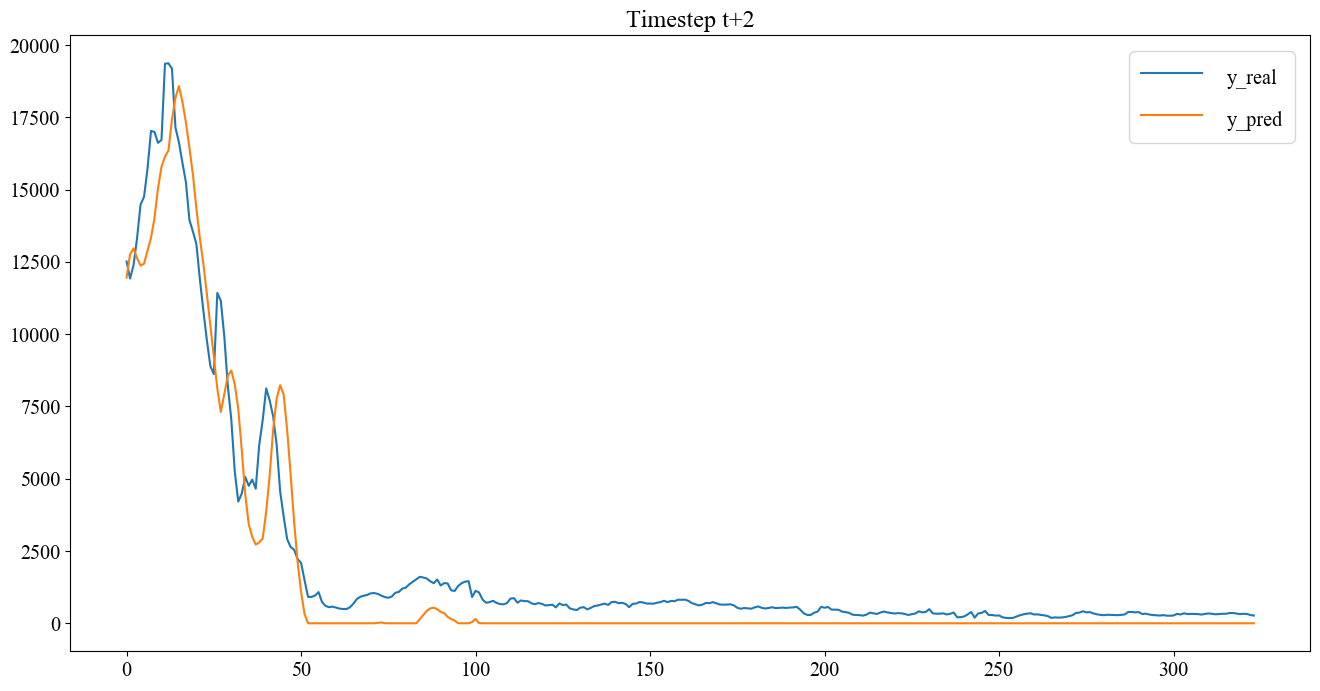

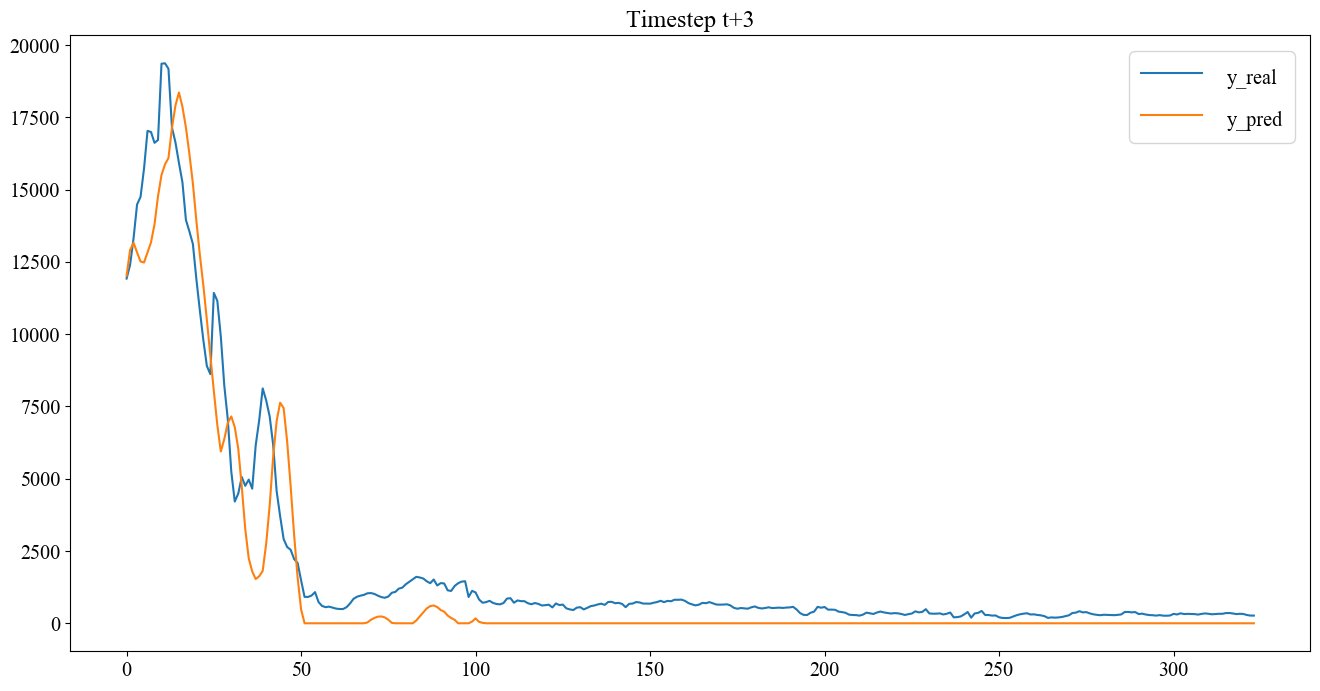

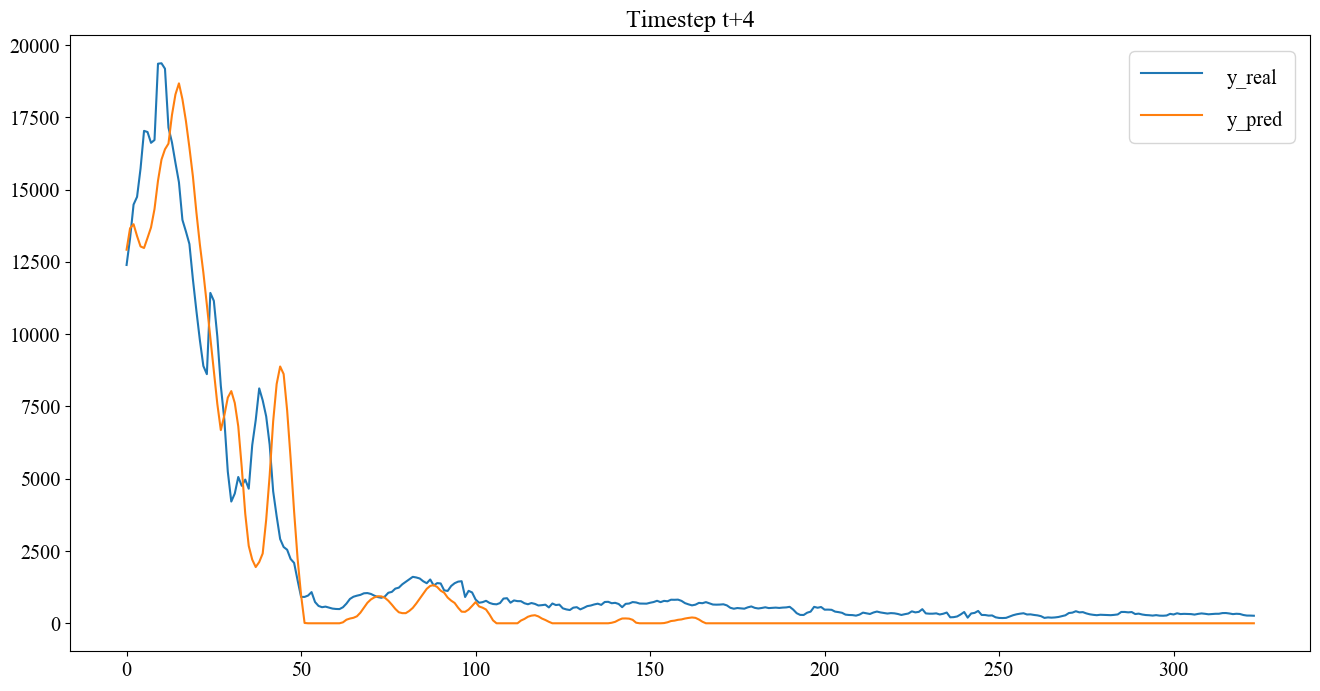

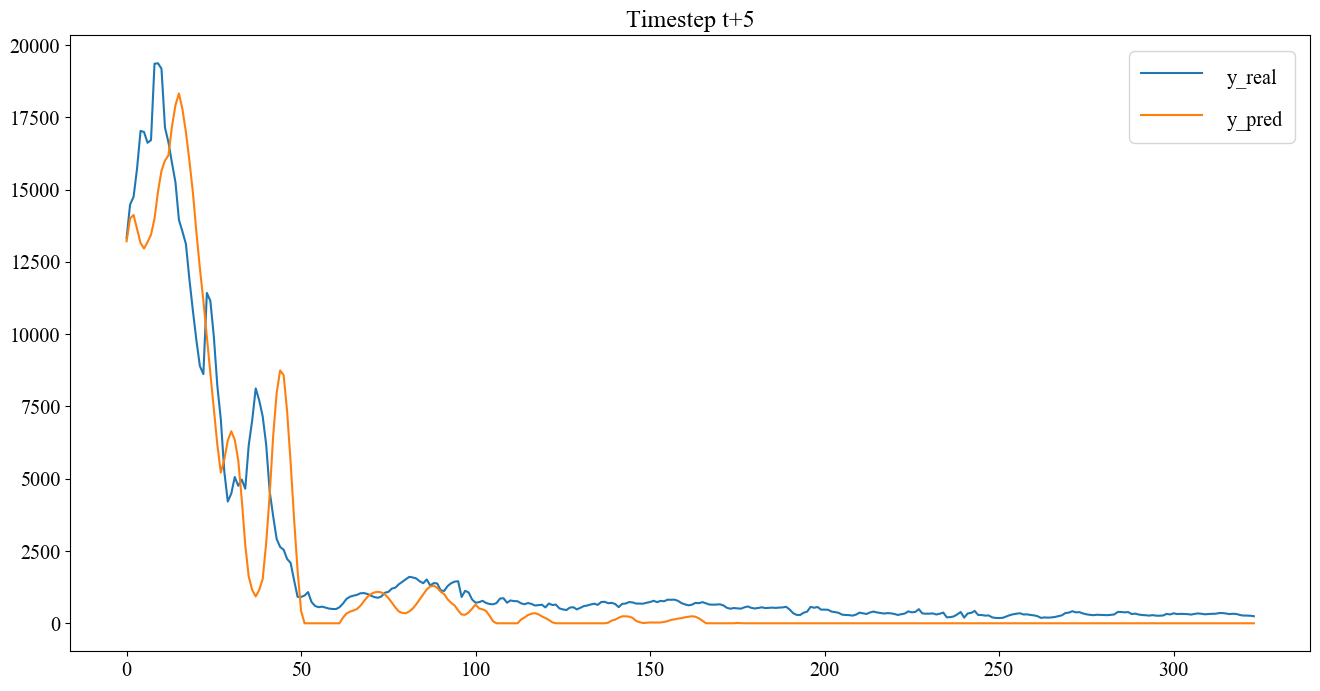

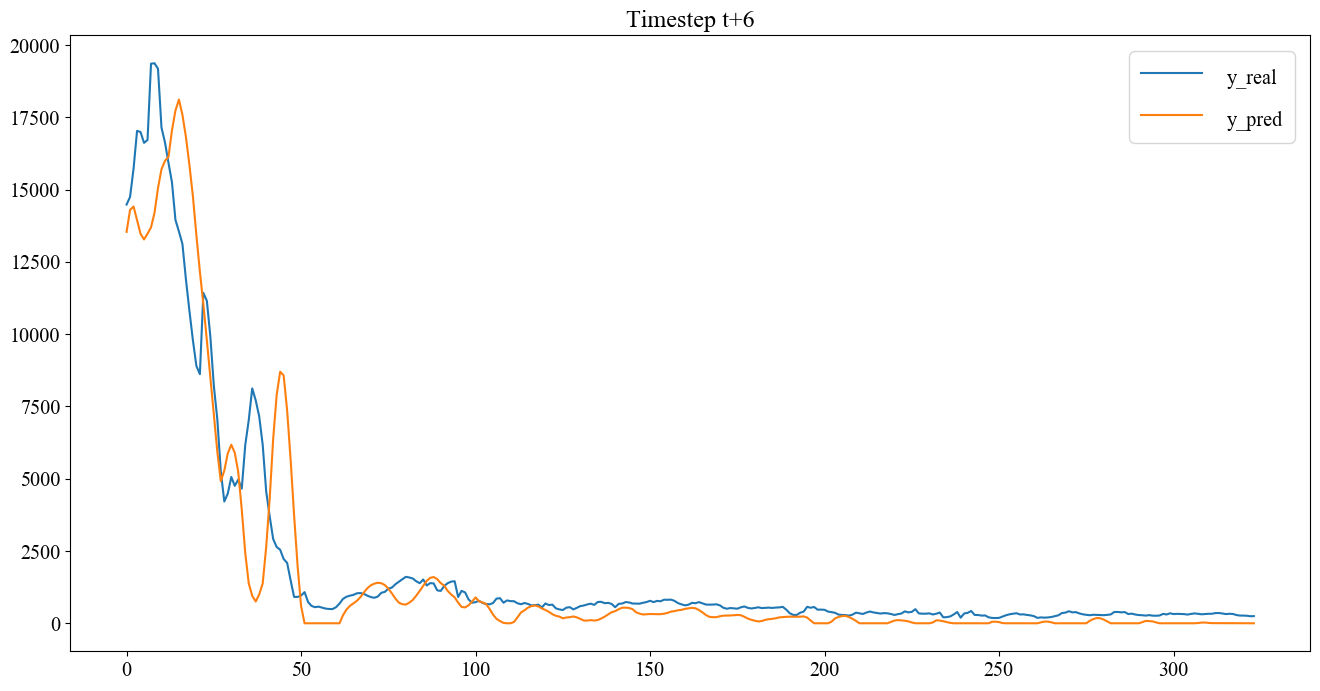

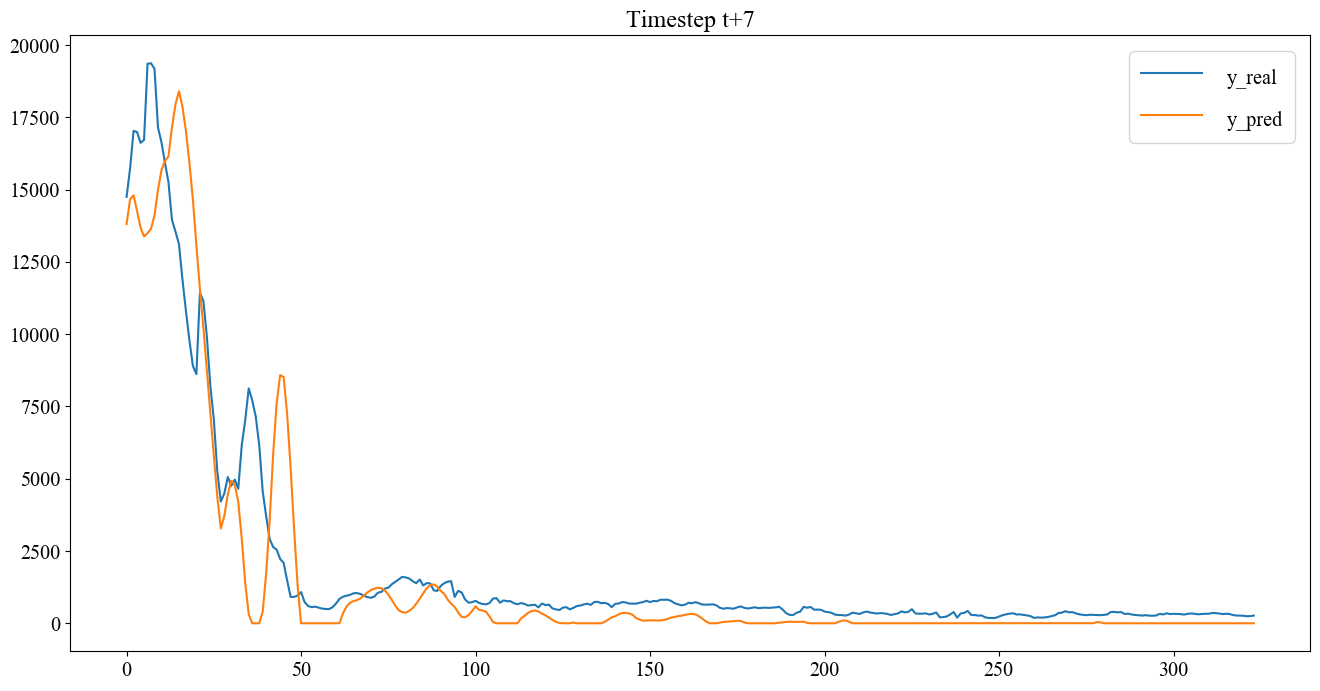

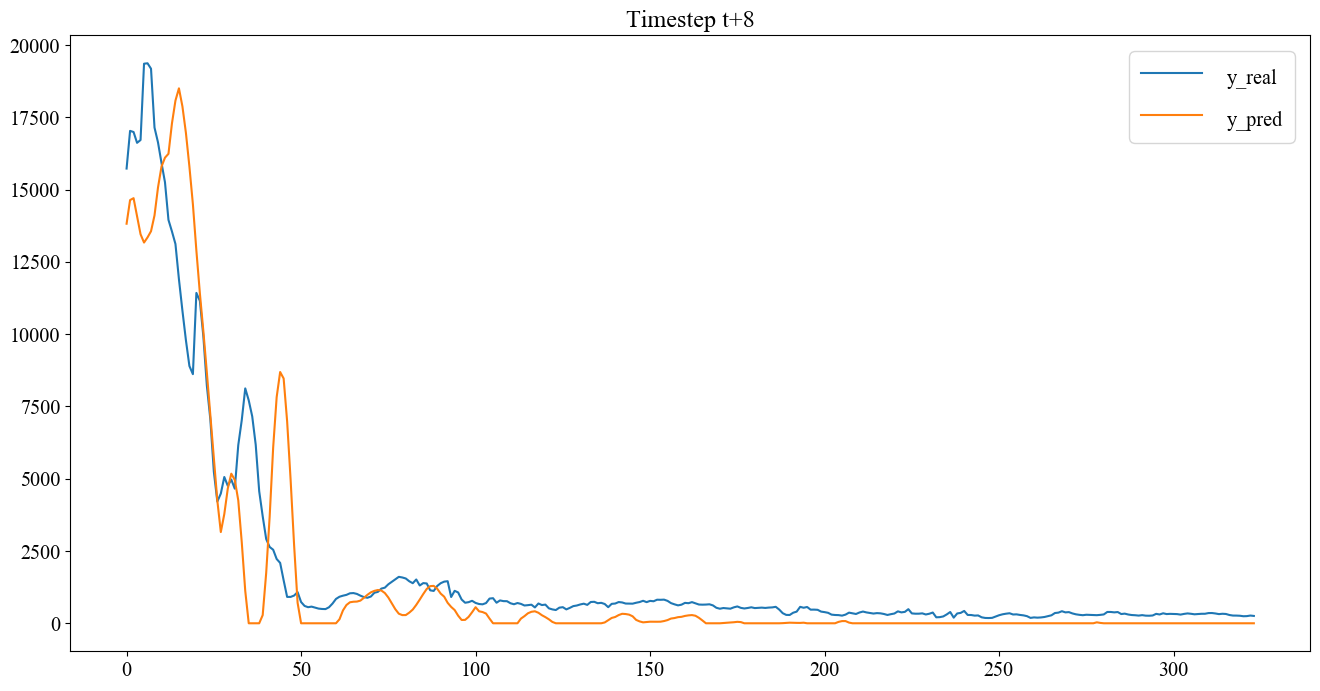

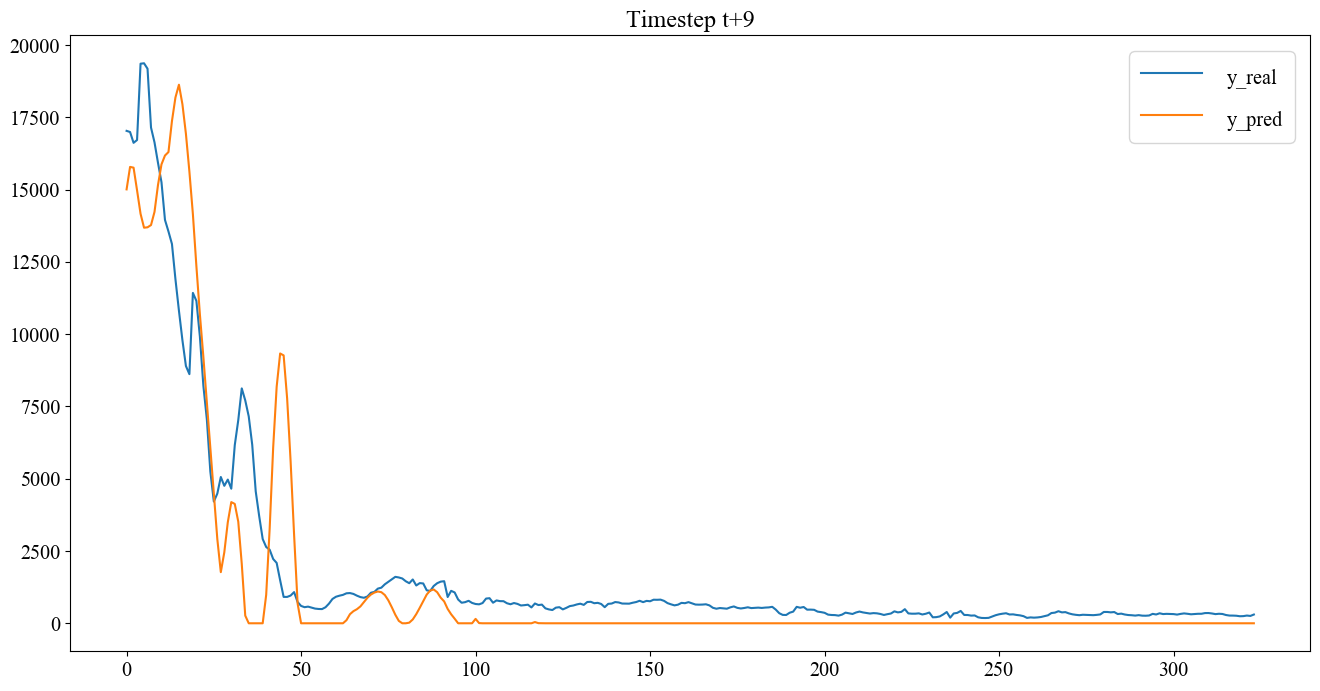

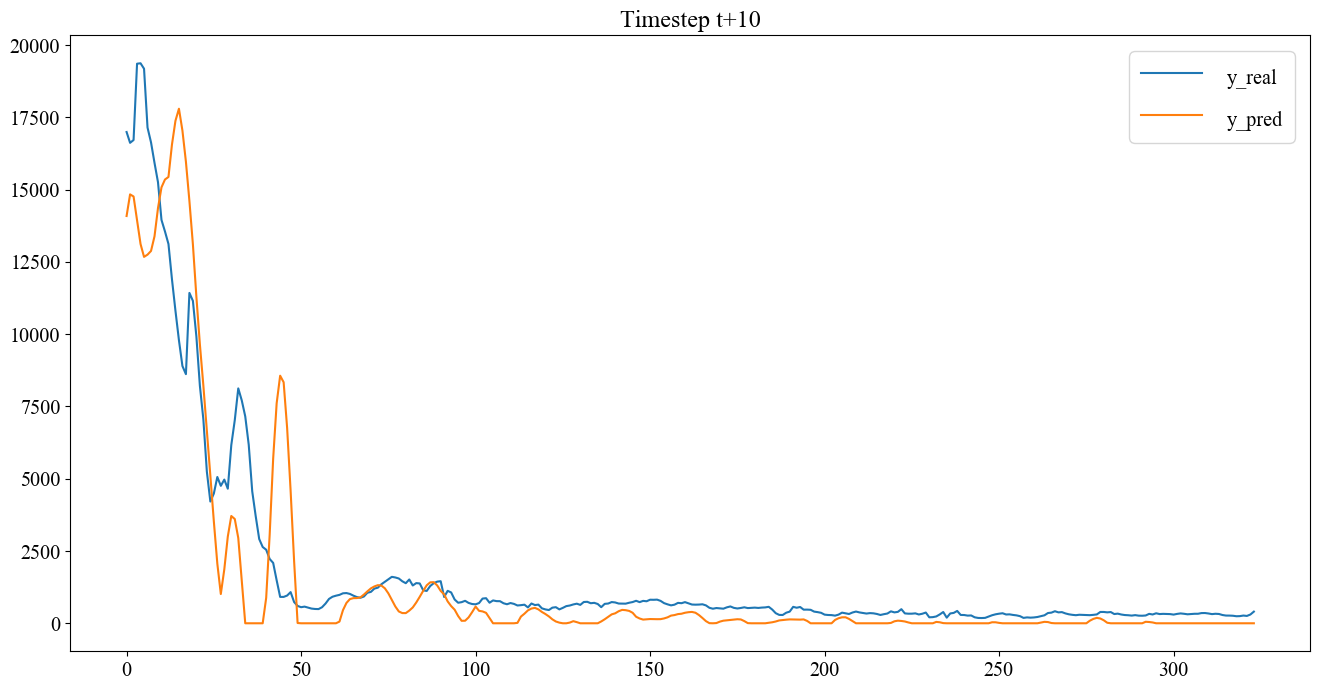

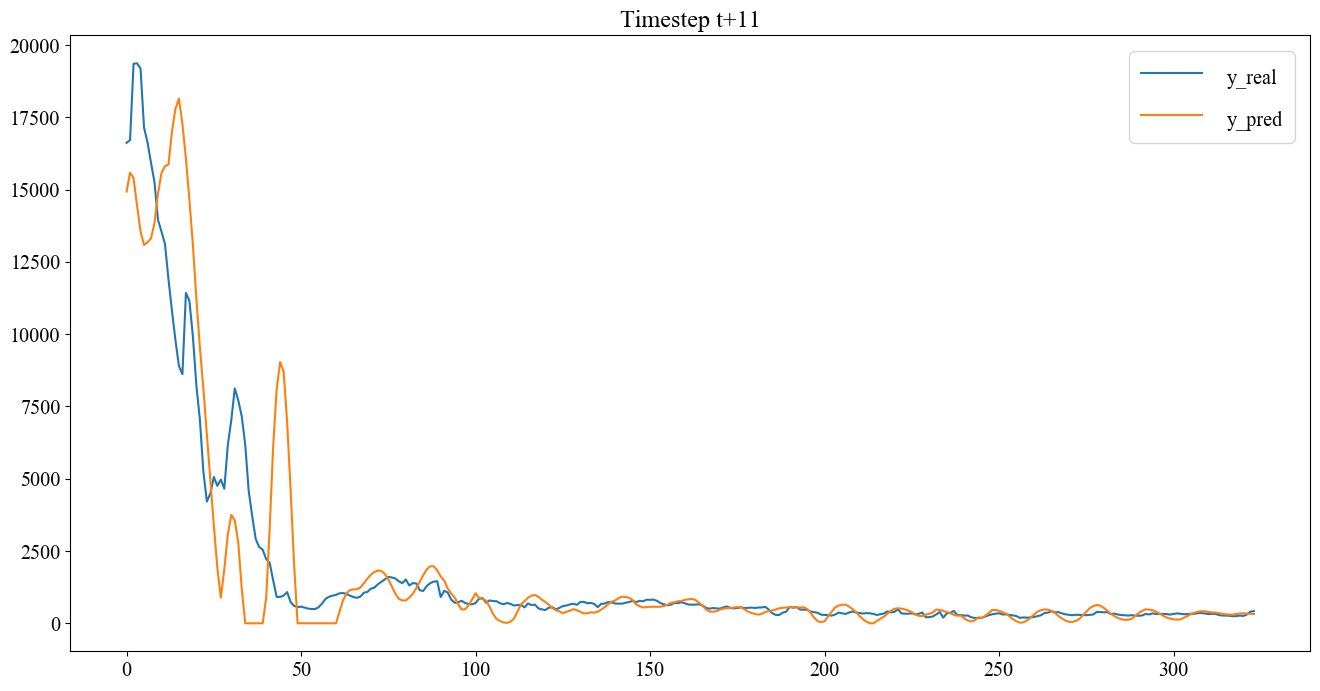

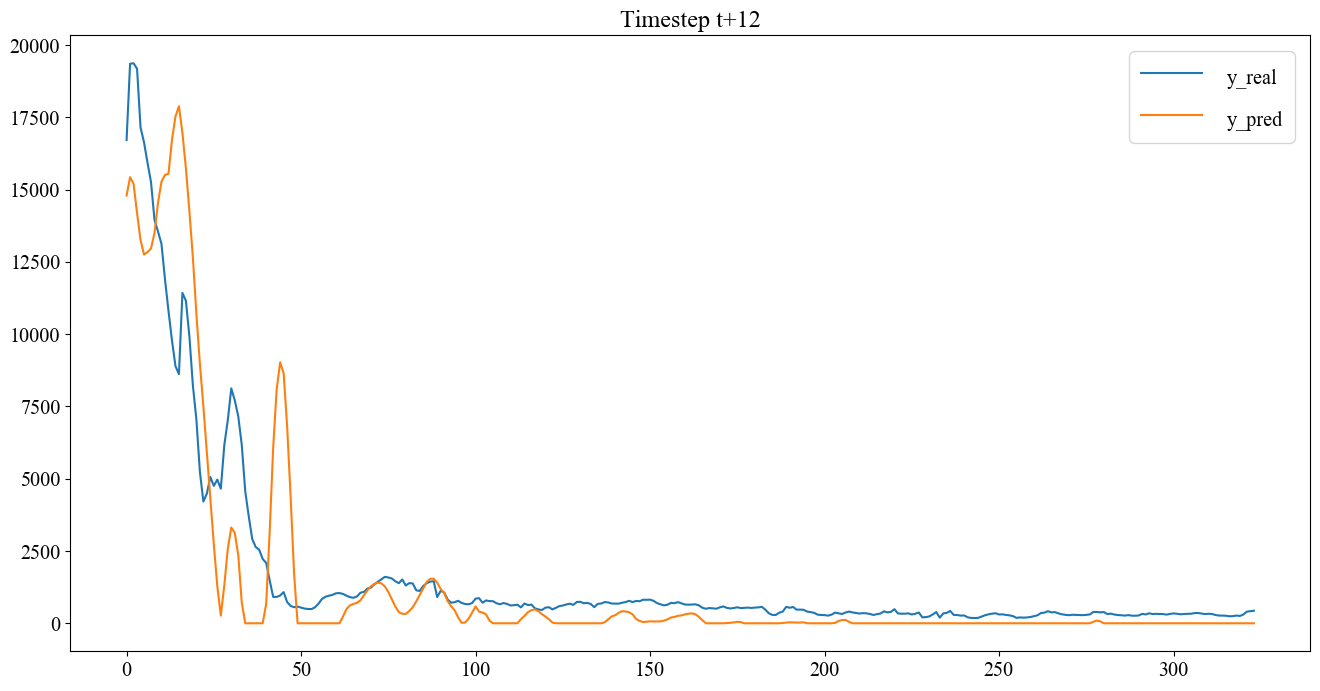

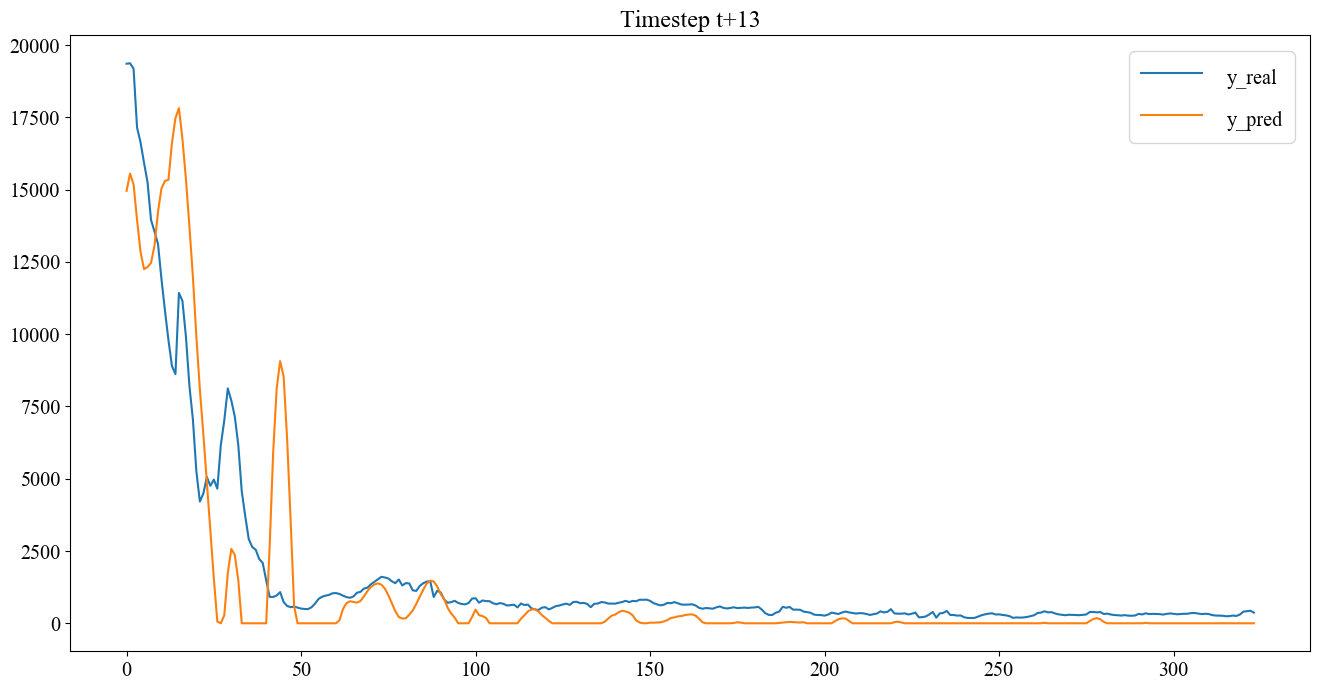

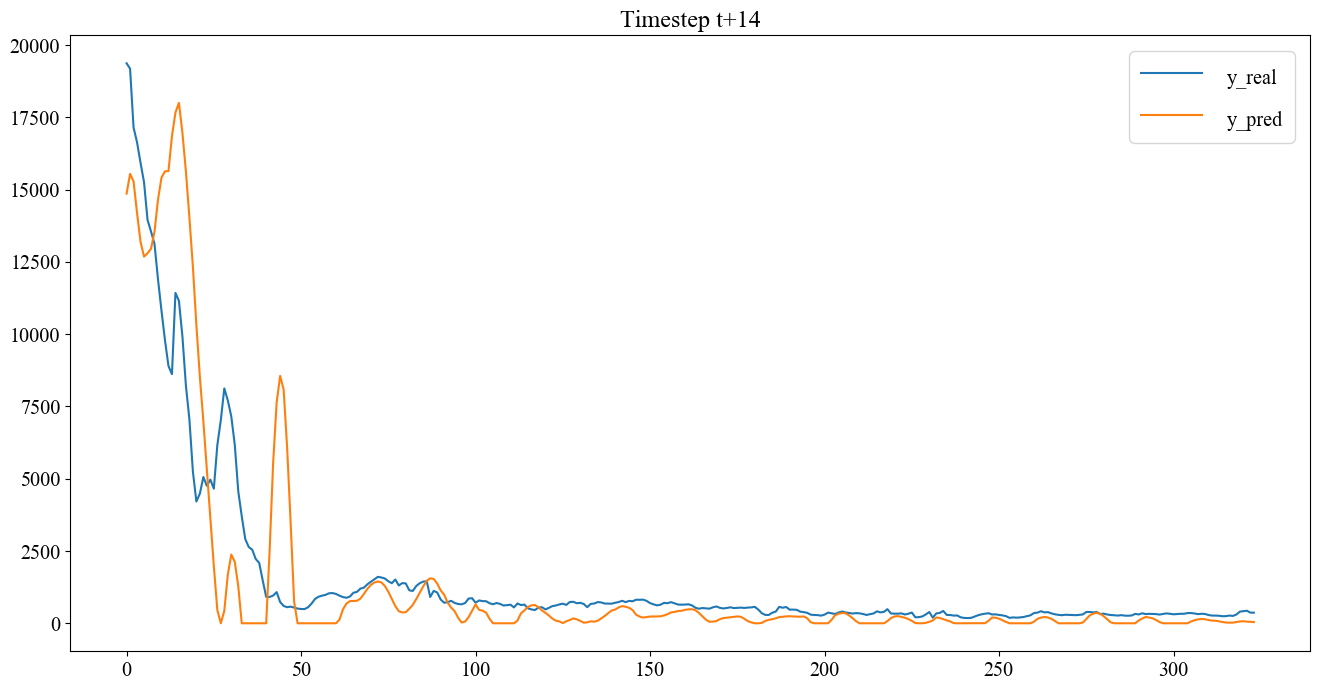

In [31]:
# =============================================================================
# Create a line graph comparing actual and predicted values for each Timestep.
# =============================================================================

for i in range(r_pred.shape[1]):
    y_pred = r_pred[:,i]
    y_pred = np.reshape(y_pred, (y_pred.shape[0], 1))
    y_real = y_test[:,i]
    y_real = np.reshape(y_real, (y_real.shape[0], 1))
    plt.figure(figsize=(16,8))
    plt.title(f'Timestep t+{i+1}')
    plt.plot(y_real, label='y_real')
    plt.plot(y_pred, label='y_pred')
    plt.legend()
    plt.show()